In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

In [95]:
# 데이터 셋 가져오기
!curl https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   104k      0 --:--:-- --:--:-- --:--:--  104k


In [96]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv")
weather

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [97]:
# [2차 프로그래밍 문제]
# 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
# cyber캠퍼스와 깃허브에 올리기
# 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

In [98]:
## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [99]:
print(weather.head(3))

print(weather.tail(3))

           일시  평균 기온  최대 풍속  평균 풍속
0  2010-08-01   28.7    8.3    3.4
1  2010-08-02   25.2    8.7    3.8
2  2010-08-03   22.1    6.3    2.9
              일시  평균 기온  최대 풍속  평균 풍속
3650  2020-07-29   21.6    3.2    1.0
3651  2020-07-30   22.9    9.7    2.4
3652  2020-07-31   25.7    4.8    2.5


In [100]:
## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오

In [101]:
weather['일시'] = pd.to_datetime(weather['일시'])

date66 = weather[weather['일시'] == '2015-06-06']
result = date66[['평균 기온', '최대 풍속', '평균 풍속']]

result

,평균 기온,최대 풍속,평균 풍속
1770,16.6,4.4,1.9


In [102]:
## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [103]:
weather['일시'] = pd.to_datetime(weather['일시'])
hottest = weather[weather['평균 기온'] == weather['평균 기온'].max()]
hottest_data = weather[weather['일시'] == hottest['일시'].values[0]]

print(hottest_data)

             일시  평균 기온  최대 풍속  평균 풍속
1103 2013-08-08   31.3    7.8    4.6


In [104]:
## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [105]:
weather['일시'] = pd.to_datetime(weather['일시'])
hot30 = weather[weather['평균 기온'] > 30]
print(hot30)

             일시  평균 기온  최대 풍속  평균 풍속
1103 2013-08-08   31.3    7.8    4.6
1104 2013-08-09   30.6    9.9    6.4
1105 2013-08-10   30.6    7.4    3.8
2913 2018-07-23   30.5    6.5    1.6
2925 2018-08-04   30.3    5.8    3.0


In [106]:
## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

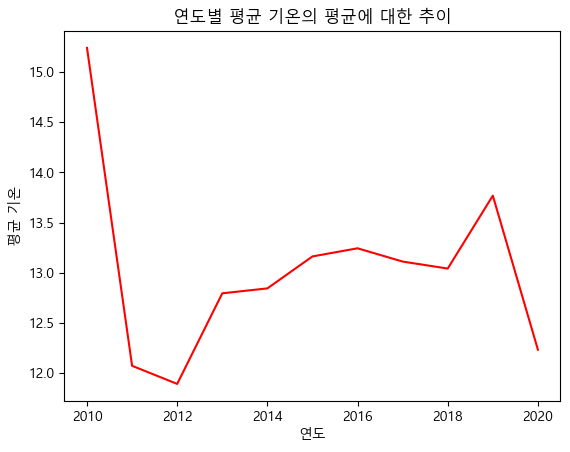

In [107]:
weather['연도'] = pd.to_datetime(weather['일시']).dt.year
year_avg = weather.groupby('연도')['평균 기온'].mean()

plt.plot(year_avg.index, year_avg.values, color='red')
plt.title('연도별 평균 기온의 평균에 대한 추이')
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.show()


In [108]:
## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

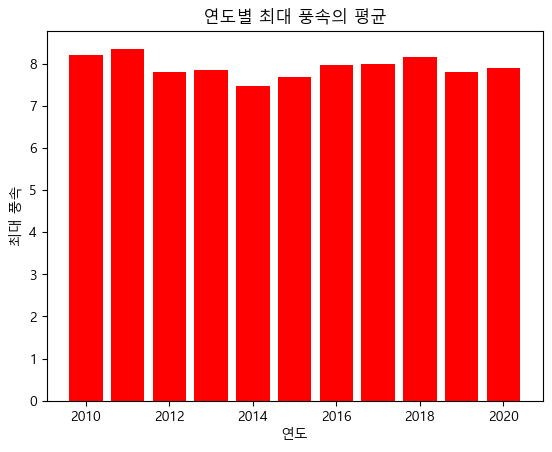

In [109]:
weather['연도'] = pd.to_datetime(weather['일시']).dt.year
maxwind_avg = weather.groupby('연도')['최대 풍속'].mean()

plt.bar(maxwind_avg.index, maxwind_avg.values, color='red')
plt.title('연도별 최대 풍속의 평균')
plt.xlabel('연도')
plt.ylabel('최대 풍속')
plt.show()

In [110]:
## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오

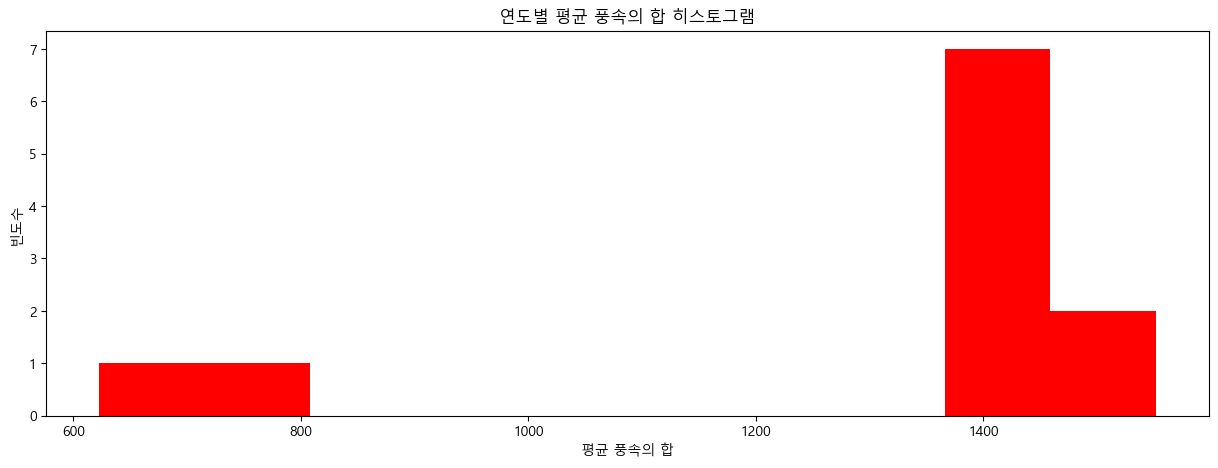

In [111]:
weather['연도'] = pd.to_datetime(weather['일시']).dt.year

avgwind_sum = weather.groupby('연도')['평균 풍속'].sum()

fig, axs = plt.subplots(1, figsize=(15, 5))
axs.hist(avgwind_sum, bins=10, color='red')
axs.set_title('연도별 평균 풍속의 합 히스토그램')
axs.set_xlabel('평균 풍속의 합')
axs.set_ylabel('빈도수')
plt.show()

In [112]:
## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [113]:
t_avg2015 = weather[weather['연도'] == 2015]['평균 기온'].mean()
t_avg2016 = weather[weather['연도'] == 2016]['평균 기온'].mean()

if ( t_avg2015 > t_avg2016 ) :
    print('2015년이 더 더웠습니다')
else:
    print('2016년이 더 더웠습니다')

2016년이 더 더웠습니다


In [114]:
## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [115]:
weather['연도'] = pd.to_datetime(weather['일시']).dt.year
weather['월'] = pd.to_datetime(weather['일시']).dt.month

month_sum = weather.groupby('월')['평균 기온'].sum()

max_month = month_sum[month_sum == month_sum.max()].index[0]
min_month = month_sum[month_sum == month_sum.min()].index[0]

print('최대 달 : ', max_month)
print('최소 달 : ', min_month)

최대 달 :  8
최소 달 :  1


In [116]:
## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [117]:
weather['연도'] = pd.to_datetime(weather['일시']).dt.year
avgwind_max = weather.groupby('연도')['최대 풍속'].mean()

max_year = avgwind_max[avgwind_max == avgwind_max.max()].index[0]

print("최대 풍속이 가장 큰 연도 : ", max_year)

최대 풍속이 가장 큰 연도 :  2011
